# Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skew, norm, probplot, boxcox
import catboost
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
%matplotlib inline
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
sns.set_style('darkgrid')

### Set output display size

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Load Dataset

In [3]:
data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [4]:
data_bkp = pd.read_csv("data/train.csv")
test_data_bkp = pd.read_csv("data/test.csv")

# Exploratory Data Analysis

In [5]:
data.shape,test_data.shape

((1460, 81), (1459, 80))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


### Missing Values

In [10]:
null_data = data.isnull().sum().sort_values(ascending=False)
null_data = null_data[null_data > 0]
print("Missing values in Train data")
null_data

Missing values in Train data


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Text(0.5, 1.0, 'Missing value in Training Dataset')

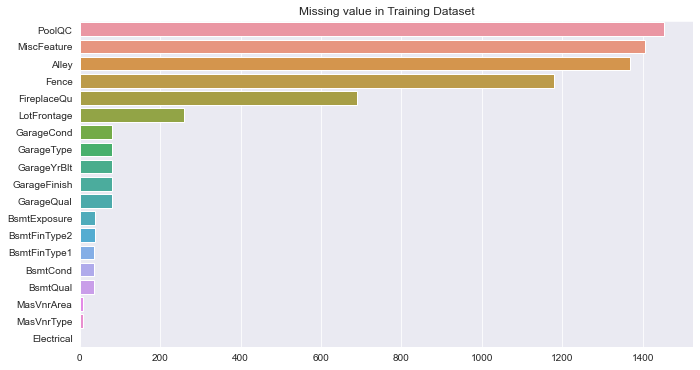

In [11]:
width = 11
height = 6
plt.figure(figsize=(width, height))
sns.barplot(null_data, null_data.index)
plt.title('Missing value in Training Dataset')

In [12]:
test_null_data = test_data.isnull().sum().sort_values(ascending=False)
test_null_data = test_null_data[test_null_data > 0]
print("Missing values in Test data")
test_null_data

Missing values in Test data


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

Text(0.5, 1.0, 'Missing value in Test Dataset')

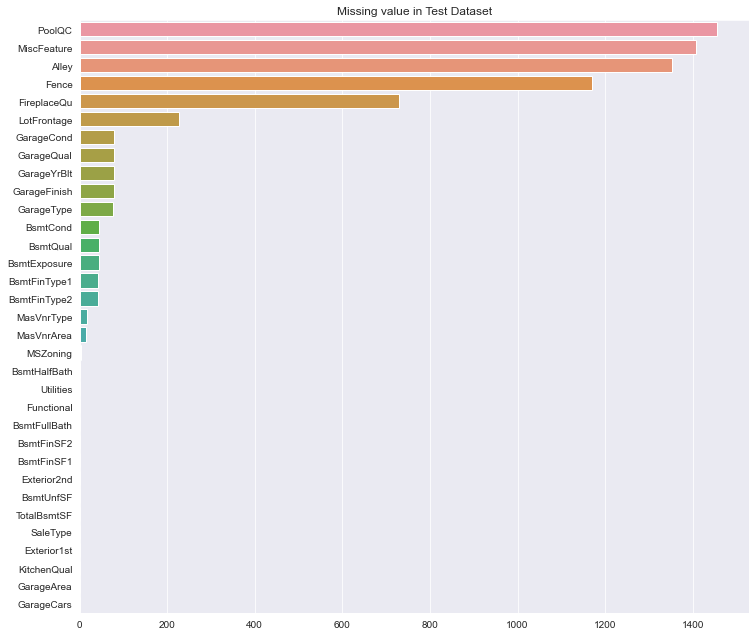

In [13]:
width = 12
height = 10.9
plt.figure(figsize=(width, height))
sns.barplot(test_null_data, test_null_data.index)
plt.title('Missing value in Test Dataset')

### Vizualise Numerical data

<AxesSubplot:>

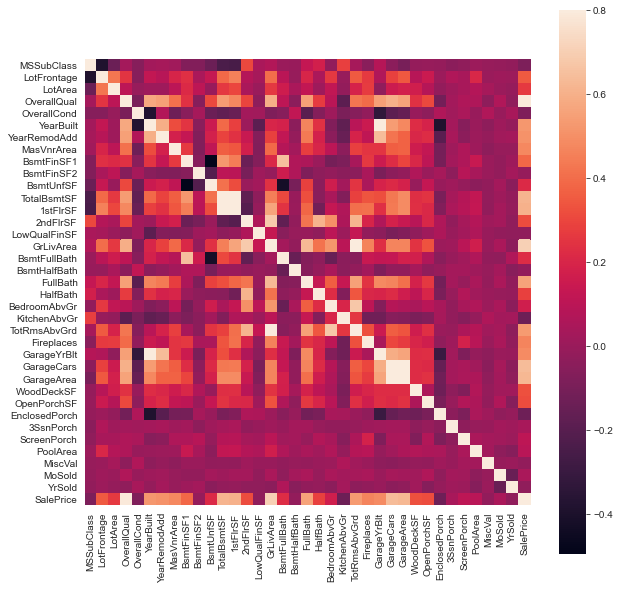

In [14]:
corr = data.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, square=True)

In [15]:
corr_list = corr['SalePrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

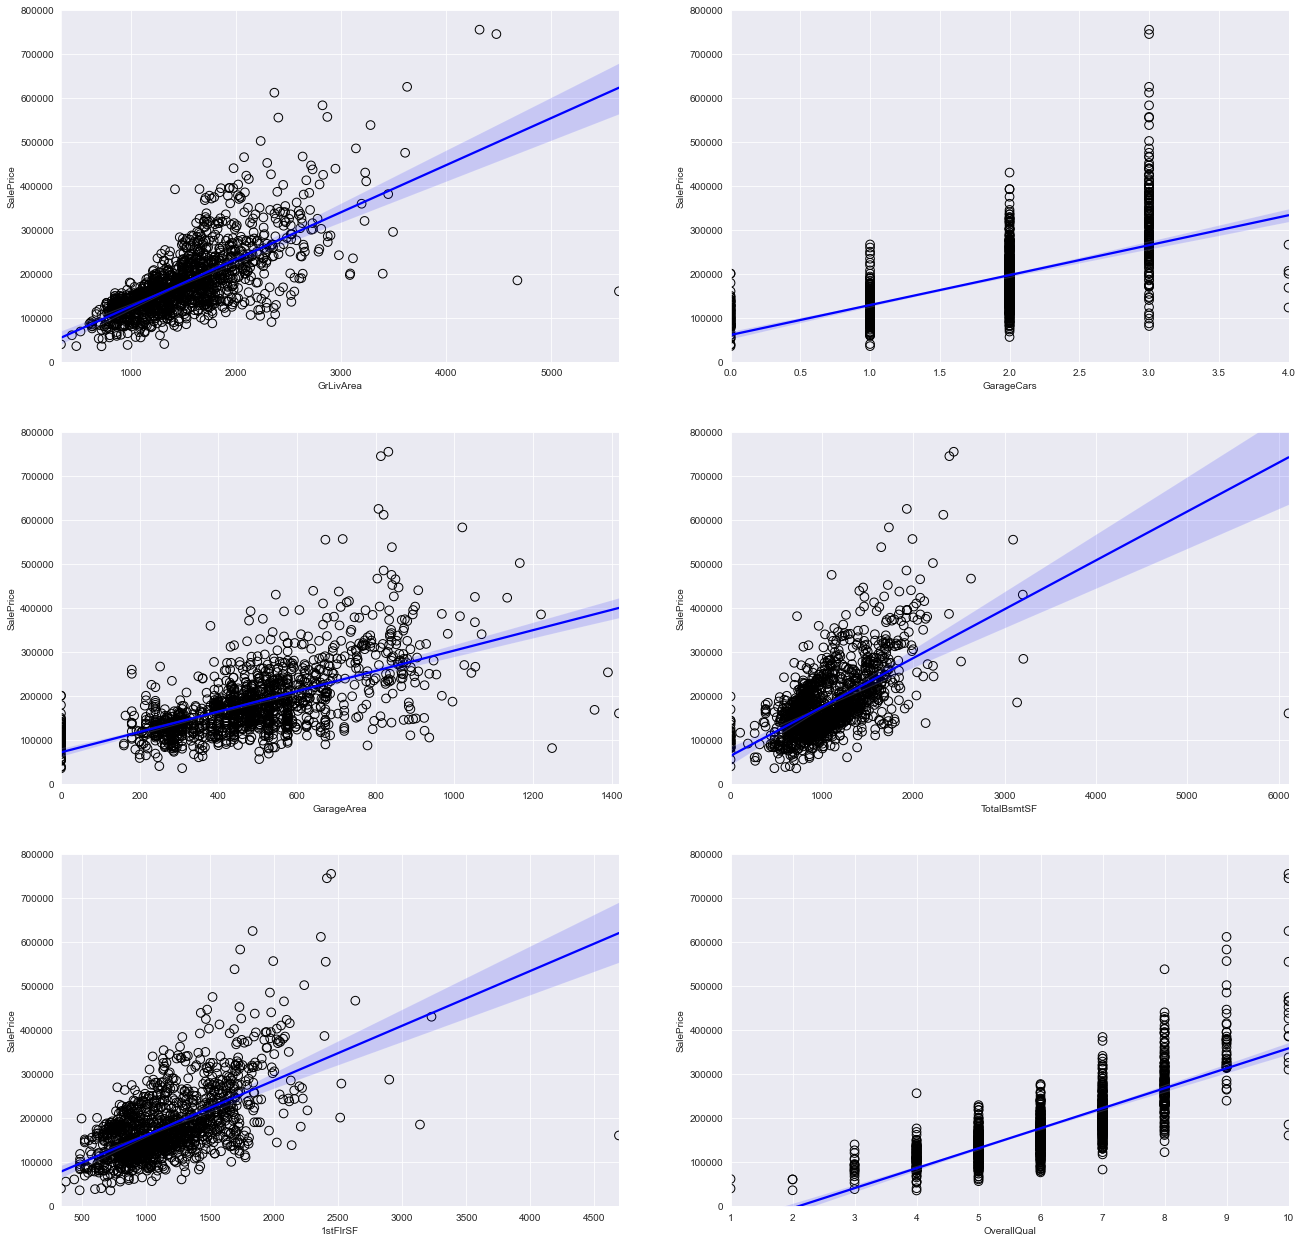

In [16]:
plt.figure(figsize=(22, 22))
k = 6

for i in range(k):
    ii = '32'+str(i)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(data[feature], data['SalePrice'], facecolors='none', edgecolors='k', s=75)
    sns.regplot(x=feature, y='SalePrice', data=data
               , scatter=False, color='b')
    ax=plt.gca()
    ax.set_ylim([0,800000])

### Vizualising Categorical features

In [17]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


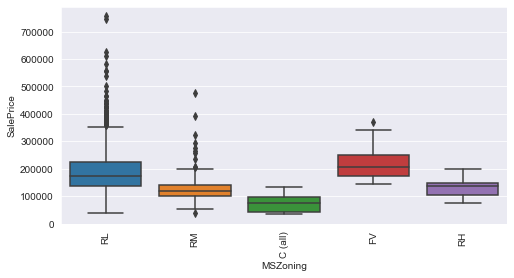

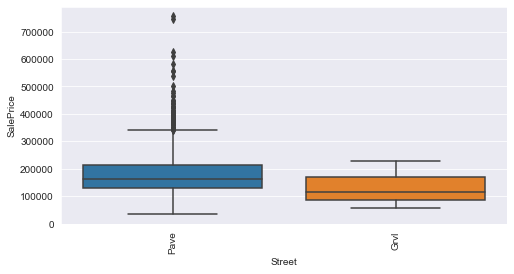

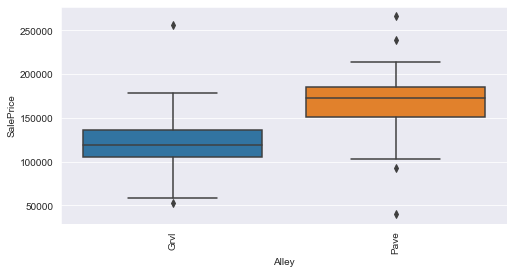

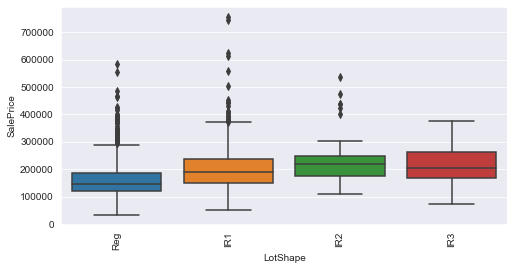

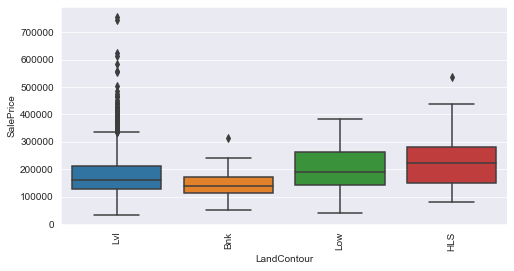

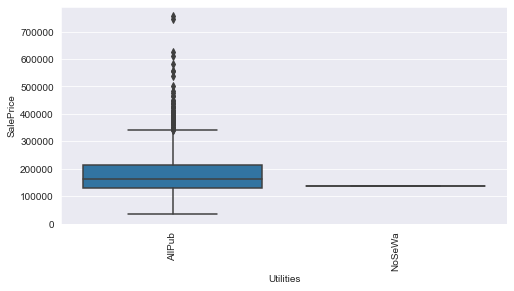

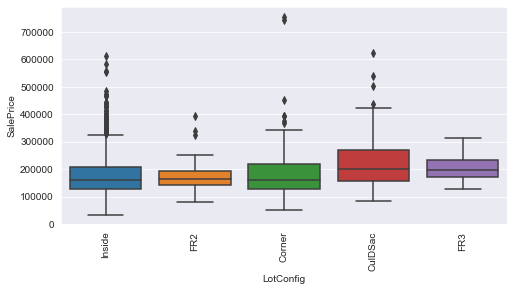

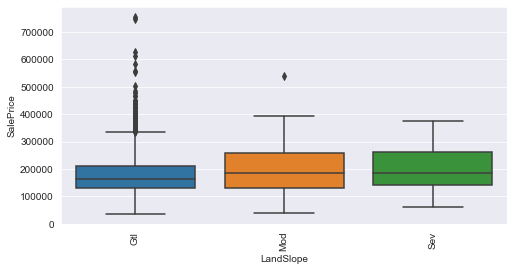

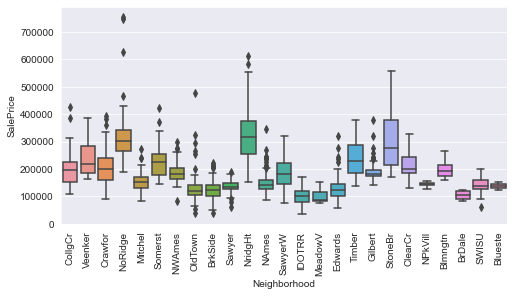

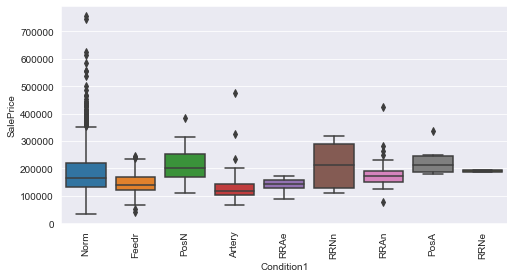

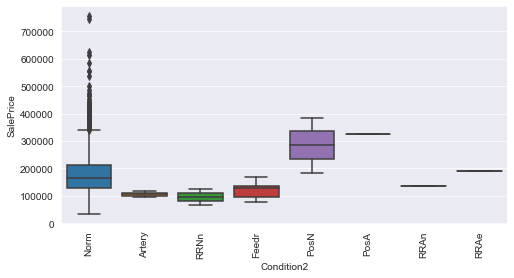

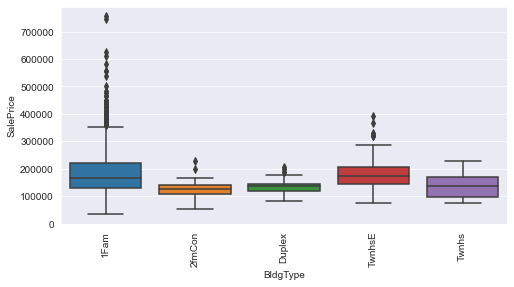

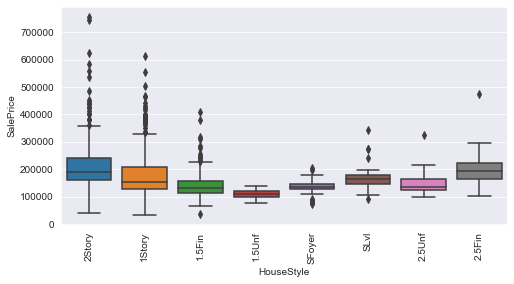

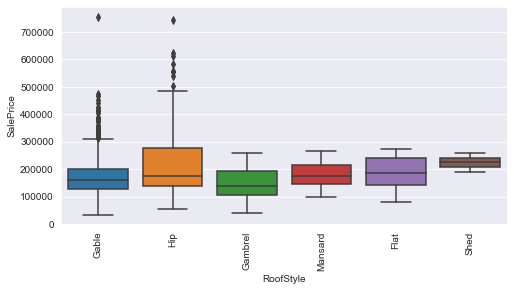

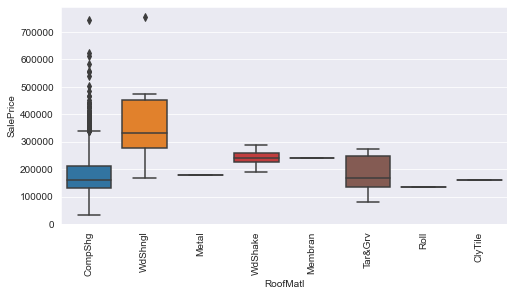

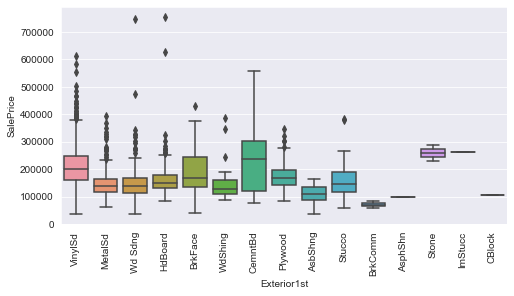

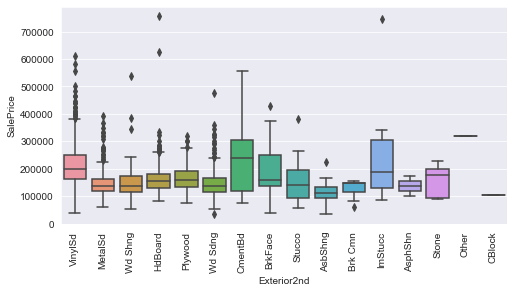

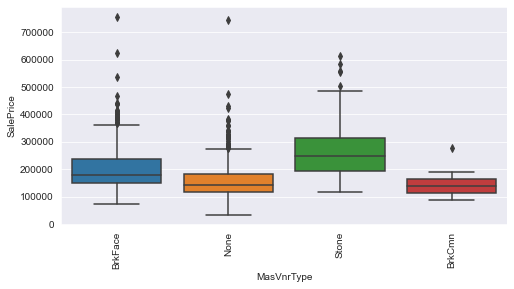

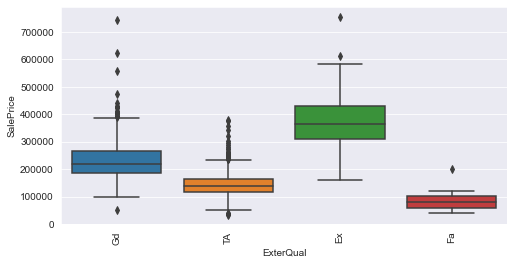

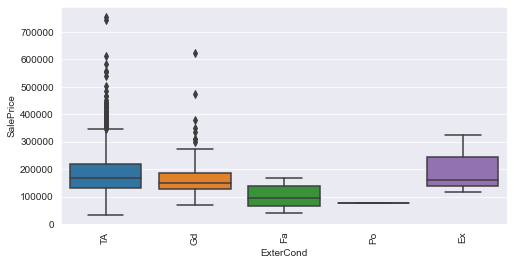

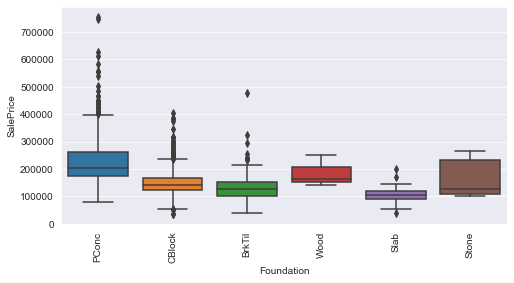

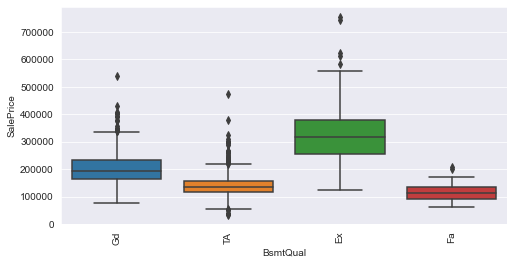

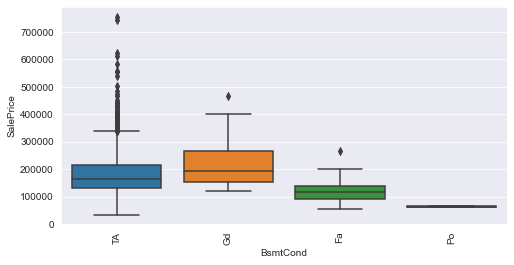

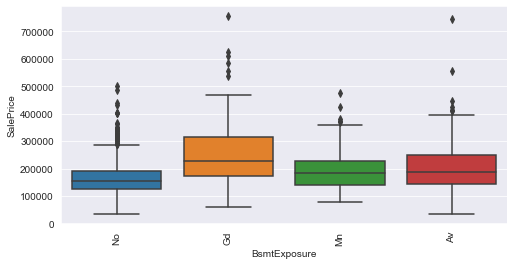

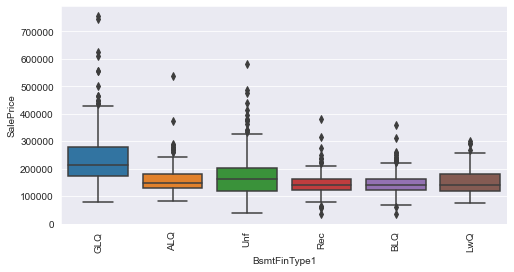

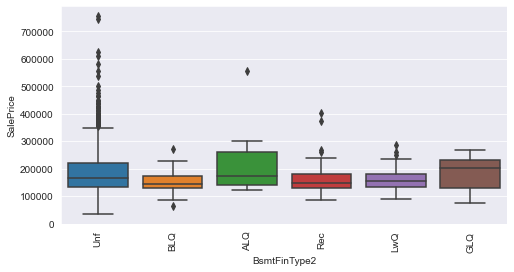

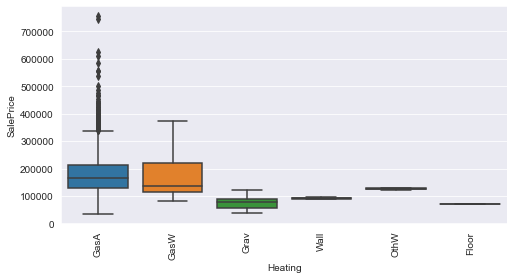

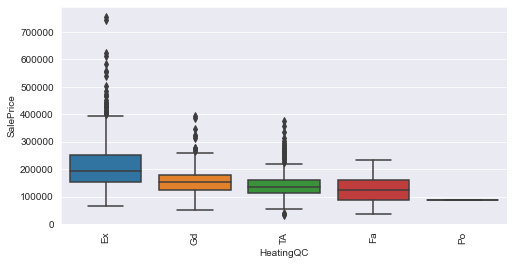

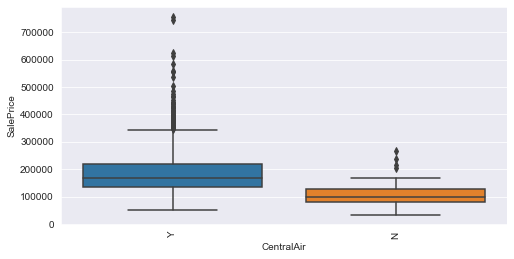

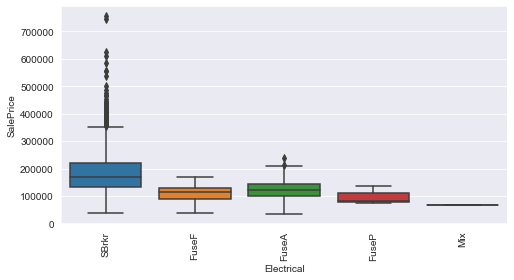

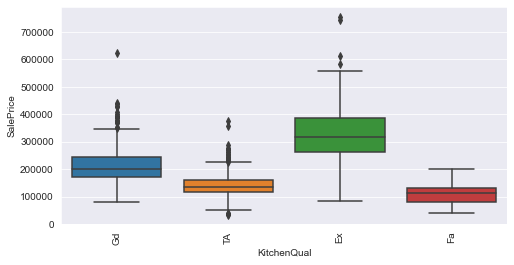

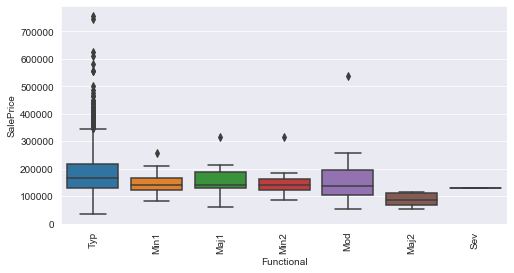

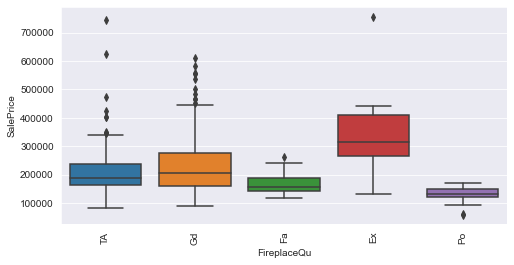

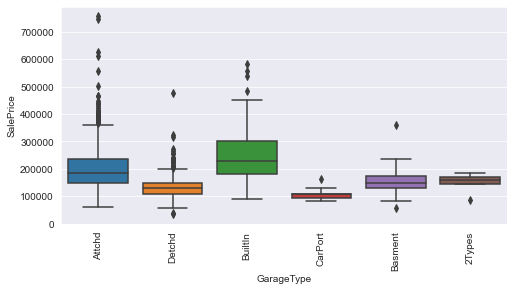

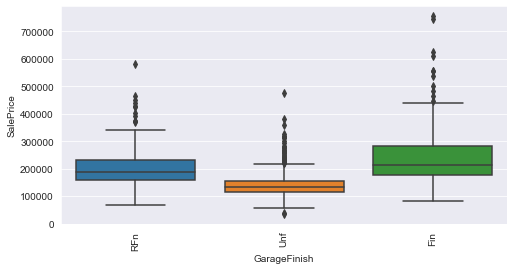

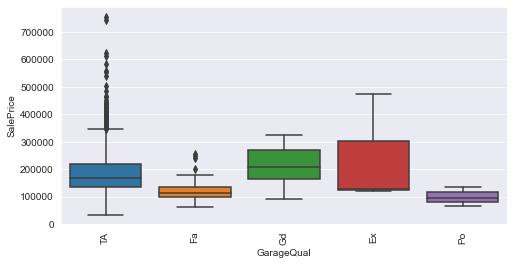

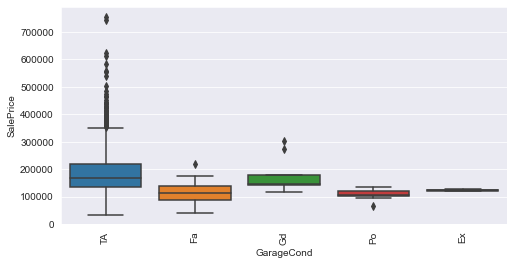

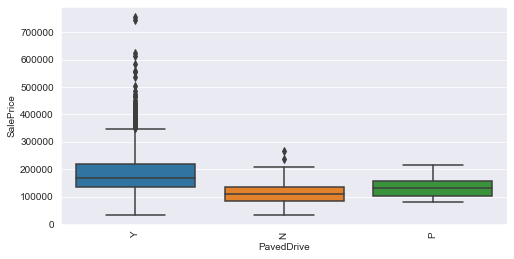

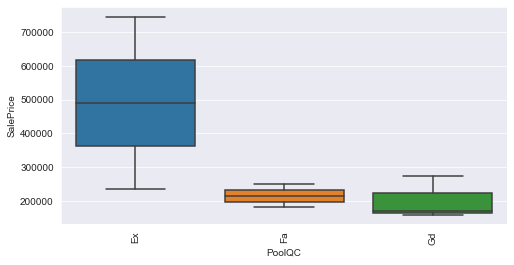

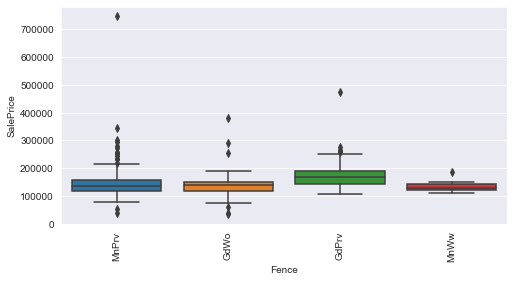

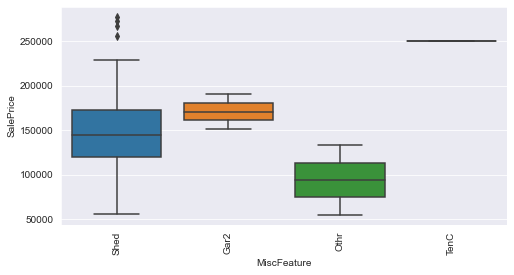

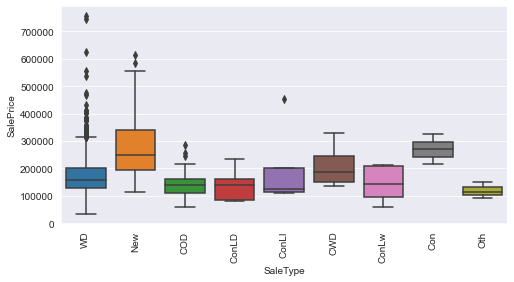

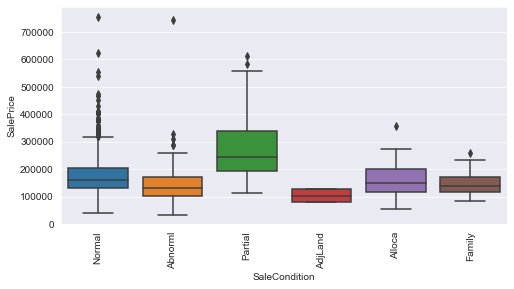

In [18]:
for i in categorical_data.dtypes.index.values:
    plt.figure(figsize=(8, 4))
    plt.xticks(rotation=90)
    sns.boxplot(x=i, y='SalePrice', data=data)    
    plt.show()

### Vizualising Target Variable

Text(0.5, 1.0, 'SalePrice distribution')

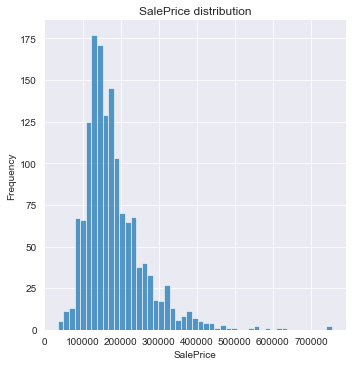

In [19]:
sns.displot(data['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Data Preprocessing

In [20]:
data = data.drop(['Id'],axis = 1)
test_data = test_data.drop(['Id'],axis = 1)

In [21]:
def null_fill(dataset_name):
 
    dataset_name['PoolQC'].fillna(0,inplace=True)
    dataset_name['MiscFeature'].fillna('NA',inplace=True)
    dataset_name['Alley'].fillna('NA',inplace=True)
    dataset_name['Fence'].fillna('NA',inplace=True)
    dataset_name['FireplaceQu'].fillna(0,inplace=True)
    mean_value = (dataset_name['LotArea']/dataset_name['LotFrontage']).mean()
    dataset_name['LotFrontage'].fillna(dataset_name['LotArea']/mean_value,inplace=True)
    dataset_name['GarageQual'].fillna(0,inplace=True)
    dataset_name['GarageYrBlt'].fillna(0,inplace=True)
    dataset_name['GarageType'].fillna('NA',inplace=True)
    dataset_name['GarageCond'].fillna(0,inplace=True)
    dataset_name['GarageFinish'].fillna(0,inplace=True)
    dataset_name['BsmtFinType2'].fillna(0,inplace=True)
    dataset_name['BsmtFinType1'].fillna(0,inplace=True)
    dataset_name['BsmtExposure'].fillna(0,inplace=True)
    dataset_name['BsmtQual'].fillna(0,inplace=True)
    dataset_name['BsmtCond'].fillna(0,inplace=True)
    dataset_name['MasVnrType'].fillna('None',inplace=True)
    dataset_name['MasVnrArea'].fillna(0,inplace=True)
    dataset_name['Electrical'].fillna('SBrkr',inplace=True)
    dataset_name['BsmtHalfBath'].fillna(0,inplace=True)
    dataset_name['BsmtFullBath'].fillna(0,inplace=True)
    dataset_name['TotalBsmtSF'].fillna(dataset_name['TotalBsmtSF'].mean(),inplace=True)
    dataset_name['GarageArea'].fillna(dataset_name['GarageArea'].mean(),inplace=True)
    dataset_name['BsmtUnfSF'].fillna(dataset_name['BsmtUnfSF'].mean(),inplace=True)
    dataset_name['GarageCars'].fillna(2,inplace=True)
    dataset_name['BsmtFinSF2'].fillna(0,inplace=True)
    dataset_name['BsmtFinSF1'].fillna(0,inplace=True)
    dataset_name['MSZoning']=dataset_name['MSZoning'].fillna(dataset_name['MSZoning'].mode()[0])
    dataset_name["Functional"] =dataset_name["Functional"].fillna("Typ")
    dataset_name["Utilities"] =dataset_name["Utilities"].fillna("AllPub")
    dataset_name['SaleType'] = dataset_name['SaleType'].fillna(dataset_name['SaleType'].mode()[0])
    dataset_name['Exterior1st'] = dataset_name['Exterior1st'].fillna(dataset_name['Exterior1st'].mode()[0])
    dataset_name['Exterior2nd'] = dataset_name['Exterior2nd'].fillna(dataset_name['Exterior2nd'].mode()[0])
    dataset_name['KitchenQual'] = dataset_name['KitchenQual'].fillna(dataset_name['KitchenQual'].mode()[0])    

In [22]:
def ordinal_data(dataset_name):
      
    dataset_name['PoolQC'] = dataset_name['PoolQC'] .replace('Ex',5, regex=True)
    dataset_name['PoolQC'] = dataset_name['PoolQC'] .replace('Gd',4, regex=True)
    dataset_name['PoolQC'] = dataset_name['PoolQC'] .replace('TA',3, regex=True)
    dataset_name['PoolQC'] = dataset_name['PoolQC'] .replace('Fa',2, regex=True)
    dataset_name['PoolQC'] = dataset_name['PoolQC'] .replace('Po',1, regex=True)
    
    dataset_name['MSSubClass']=dataset_name['MSSubClass'].astype(str)
    dataset_name['YrSold']=dataset_name['YrSold'].astype(str)
    dataset_name['MoSold']=dataset_name['MoSold'].astype(str)
    
    dataset_name['ExterQual'] = dataset_name['ExterQual'] .replace('Ex',5, regex=True)
    dataset_name['ExterQual'] = dataset_name['ExterQual'] .replace('Gd',4, regex=True)
    dataset_name['ExterQual'] = dataset_name['ExterQual'] .replace('TA',3, regex=True)
    dataset_name['ExterQual'] = dataset_name['ExterQual'] .replace('Fa',2, regex=True)
    dataset_name['ExterQual'] = dataset_name['ExterQual'] .replace('Po',1, regex=True)
    
    dataset_name['ExterCond'] = dataset_name['ExterCond'] .replace('Ex',5, regex=True)
    dataset_name['ExterCond'] = dataset_name['ExterCond'] .replace('Gd',4, regex=True)
    dataset_name['ExterCond'] = dataset_name['ExterCond'] .replace('TA',3, regex=True)
    dataset_name['ExterCond'] = dataset_name['ExterCond'] .replace('Fa',2, regex=True)
    dataset_name['ExterCond'] = dataset_name['ExterCond'] .replace('Po',1, regex=True)      

In [23]:
data["SalePrice"] = np.log1p(data["SalePrice"])
y = data.SalePrice.reset_index(drop=True)

Text(0.5, 1.0, 'SalePrice distribution')

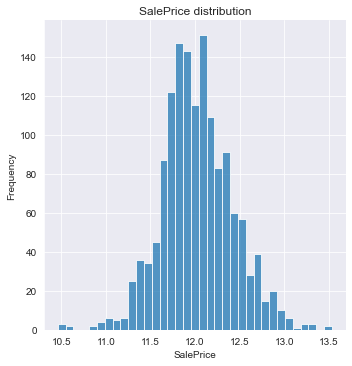

In [24]:
sns.displot(data['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [25]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y, y_test = train_test_split(data, y, test_size=0.30, random_state=1010)

# Data Modeling

### Pycaret to find the best model

In [26]:
#Perform the preprocessing steps created above on the our dataset
null_fill(data)
ordinal_data(data)
null_fill(X_train)
ordinal_data(X_train)
null_fill(test_data)
ordinal_data(test_data)

In [27]:
final_data = data.copy()
final_data = final_data.drop(['SalePrice'], axis=1)

In [28]:
from pycaret.regression import *
s = setup(data = data,
          target = 'SalePrice',
          session_id = 190)

,Description,Value
0,session_id,190
1,Target,SalePrice
2,Original Data,"(1460, 80)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 398)"


In [29]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0840,0.0161,0.1255,0.8934,0.0097,0.0070,3.0410
br,Bayesian Ridge,0.0843,0.0186,0.1321,0.8797,0.0102,0.0071,0.1180
gbr,Gradient Boosting Regressor,0.0924,0.0187,0.1353,0.8767,0.0105,0.0077,0.2080
omp,Orthogonal Matching Pursuit,0.0912,0.0193,0.1363,0.8727,0.0105,0.0076,0.0240
lightgbm,Light Gradient Boosting Machine,0.0957,0.0200,0.1403,0.8673,0.0109,0.0080,0.1220
ridge,Ridge Regression,0.0895,0.0205,0.1391,0.8661,0.0107,0.0075,0.0270
rf,Random Forest Regressor,0.0995,0.0217,0.1460,0.8572,0.0113,0.0083,0.4090
xgboost,Extreme Gradient Boosting,0.1005,0.0225,0.1490,0.8497,0.0116,0.0084,0.4910
lr,Linear Regression,0.1012,0.0255,0.1560,0.8318,0.0121,0.0085,0.4380
huber,Huber Regressor,0.1125,0.0286,0.1669,0.8119,0.0128,0.0094,0.2750


## Implementing the final model

In [30]:
X_train = X_train.drop(['SalePrice'], axis=1)

In [31]:
# List out categorical data to feed into the catbosst alogrithm
cat_feat=X_train.dtypes[X_train.dtypes== "object"].index

In [32]:
cat_model= CatBoostRegressor()
cat_model.fit(X_train, y,cat_features=cat_feat)

Learning rate set to 0.039182
0:	learn: 0.3893444	total: 65.4ms	remaining: 1m 5s
1:	learn: 0.3801648	total: 118ms	remaining: 58.7s
2:	learn: 0.3717026	total: 177ms	remaining: 58.8s
3:	learn: 0.3630070	total: 255ms	remaining: 1m 3s
4:	learn: 0.3552426	total: 335ms	remaining: 1m 6s
5:	learn: 0.3474979	total: 401ms	remaining: 1m 6s
6:	learn: 0.3394086	total: 465ms	remaining: 1m 5s
7:	learn: 0.3315446	total: 517ms	remaining: 1m 4s
8:	learn: 0.3240005	total: 582ms	remaining: 1m 4s
9:	learn: 0.3167246	total: 641ms	remaining: 1m 3s
10:	learn: 0.3095219	total: 704ms	remaining: 1m 3s
11:	learn: 0.3035893	total: 782ms	remaining: 1m 4s
12:	learn: 0.2974264	total: 836ms	remaining: 1m 3s
13:	learn: 0.2915889	total: 882ms	remaining: 1m 2s
14:	learn: 0.2856495	total: 950ms	remaining: 1m 2s
15:	learn: 0.2803075	total: 1.01s	remaining: 1m 2s
16:	learn: 0.2747198	total: 1.1s	remaining: 1m 3s
17:	learn: 0.2691012	total: 1.16s	remaining: 1m 3s
18:	learn: 0.2641392	total: 1.23s	remaining: 1m 3s
19:	learn: 

In [33]:
#Fit the test dataset
cat_predicted_value=cat_model.predict(test_data)
cat_predicted_value = np.expm1(cat_predicted_value)

In [34]:
#Store the predicted result into CSV file using dataframe
catboost_result_data = pd.DataFrame()
catboost_result_data['Id'] = test_data_bkp['Id']
catboost_result_data['SalePrice'] = cat_predicted_value
catboost_result_data.to_csv('carboost_karthik.csv',index=False)